In [2]:
import os

# Anzeigen des aktuellen Arbeitsverzeichnisses
current_working_directory = os.getcwd()
print("Aktuelles Arbeitsverzeichnis:", current_working_directory)

Aktuelles Arbeitsverzeichnis: /Users/henrikfliegel/Desktop/Uni/SoSe24/MlClaas/ML-with-CLAAS


In [3]:
import pandas as pd

dfn1 = pd.read_excel('CLAAS_data/S611_Teil_1_P10_20240604.XLSX')
dfn2 = pd.read_excel('CLAAS_data/S611_Teil_2_P10_20240604.XLSX')


In [4]:
def extract_and_create_columns(df, column_name):
    # Überprüfen, ob die Spalte im DataFrame existiert
    if column_name in df.columns:
        # Aufteilen der Spalte in eine Liste von Listen, wobei jede Liste die geteilten Worte enthält
        split_columns = df[column_name].str.split()

        # Erstellen der 'Merkmal' Spalte durch Auswahl des ersten Teils des gesplitteten Strings
        df['Merkmal'] = split_columns.str[0]

        # Erstellen der 'Merkmalwert' Spalte durch Auswahl des zweiten Teils des gesplitteten Strings
        df['Merkmalwert'] = split_columns.str[1]
        
        # Erstellen einer neuen Spalte 'Erste_Drei_Zeichen'
        df['Maschinentyp'] = df['Seriennummer'].str[:3]

    else:
        print(f"Die Spalte {column_name} existiert nicht im DataFrame.")
    return df



In [5]:
dfn = pd.concat([dfn1, dfn2])

df = extract_and_create_columns(dfn, 'Merkmal/Wert/Bezeichng. f. Serienplanun')

merkmale = ['P02', 'N02', 'N08', 'N05', 'B10', 'G02',]

filtered_df = df[df['Merkmal'].isin(merkmale)]

filtered_df_crop = filtered_df.drop(['Statistik-Herkunft', 'Version', 'Monat', 'Woche', 'Periode', 'Werk', 'Material', 'Merkmal/Wert/Bezeichng. f. Serienplanun', 'GeschJahresvariante', 'Zeiger Verw.daten', 'Zeiger Verw.daten', 'Basismengeneinheit', 'Bedarfsmenge'], axis=1).reset_index(drop = True)

filtered_df_crop

,Datum,Seriennummer,CLAAS - Untertyp,Claas-Planungsland,Geschäftsjahr,Bestätigte Menge,Merkmal,Merkmalwert,Maschinentyp
0,2012-11-22,C6613081,820,LTE,2013,1,B10,0040,C66
1,2012-11-22,C6613081,820,LTE,2013,1,G02,0240,C66
2,2012-11-22,C6613081,820,LTE,2013,1,N02,0624,C66
3,2012-11-22,C6613081,820,LTE,2013,1,N05,0121,C66
4,2012-11-22,C6613081,820,LTE,2013,1,N08,0398,C66
...,...,...,...,...,...,...,...,...,...
118397,2024-09-12,C8624511,935,SE,2024,1,G02,0486,C86
118398,2024-09-12,C8624511,935,SE,2024,1,N02,0628,C86
118399,2024-09-12,C8624511,935,SE,2024,1,N05,0424,C86
118400,2024-09-12,C8624511,935,SE,2024,1,N08,0860,C86


In [8]:
import pandas as pd
from collections import defaultdict

# Angenommen df ist Ihr DataFrame und er enthält eine 'Datum'-Spalte im Datetime-Format
# Wenn das 'Datum' nicht im Datetime-Format ist, konvertieren Sie es wie folgt:
# df['Datum'] = pd.to_datetime(df['Datum'])

# Ein Wörterbuch, um die DataFrames zu speichern
monthly_aggregates = defaultdict(dict)

# Gruppierung nach 'Merkmalname'
grouped_by_merkmalname = filtered_df.groupby('Merkmal')

# Erstellen eines Wörterbuchs für die Gesamtmengen pro Merkmalname und Monat
total_monthly_by_merkmalname = {}

# Berechnen der monatlichen Gesamtmengen für jedes Merkmalname
for merkmalname, group in grouped_by_merkmalname:
    total_monthly = group.resample('M', on='Datum')['Bestätigte Menge'].sum()
    total_monthly_by_merkmalname[merkmalname] = total_monthly

# Gruppierung nach 'Merkmalname' und 'Merkmalwert'
grouped = filtered_df.groupby(['Merkmal', 'Merkmalwert'])

# Durchlaufen aller Gruppen
for (merkmalname, merkmalwert), group in grouped:
    # Aggregation der 'Bestätigte Menge' nach Monat
    monthly_data = group.resample('M', on='Datum')['Bestätigte Menge'].sum().reset_index()
    # Berechnen des relativen Anteils
    relative_share = monthly_data.set_index('Datum')['Bestätigte Menge'] / total_monthly_by_merkmalname[merkmalname].reindex(monthly_data['Datum'], fill_value=0)
    # Hinzufügen der Spalte für den relativen Anteil
    monthly_data['Relativer Anteil'] = relative_share.values  # Achten Sie darauf, die Datum-Indizierung beizubehalten
    # Speichern des DataFrames im Wörterbuch
    monthly_aggregates[merkmalname][merkmalwert] = monthly_data

# Beispiel, um auf die Daten zuzugreifen:
for merkmalname, values in monthly_aggregates.items():
    for merkmalwert, data_df in values.items():
        print(f"Merkmal: {merkmalname}, Merkmalwert: {merkmalwert}")
        print(data_df)
        print()  # Für bessere Lesbarkeit eine leere Zeile hinzufügen


/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_82918/1601552503.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  total_monthly = group.resample('M', on='Datum')['Bestätigte Menge'].sum()
/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_82918/1601552503.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = group.resample('M', on='Datum')['Bestätigte Menge'].sum().reset_index()
/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_82918/1601552503.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = group.resample('M', on='Datum')['Bestätigte Menge'].sum().reset_index()
/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_82918/1601552503.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = g

Merkmal: B10, Merkmalwert: 0030
        Datum  Bestätigte Menge  Relativer Anteil
0  2013-04-30                 3          0.007692
1  2013-05-31                 0          0.000000
2  2013-06-30                 0          0.000000
3  2013-07-31                 0          0.000000
4  2013-08-31                 0          0.000000
5  2013-09-30                 0          0.000000
6  2013-10-31                 1          0.006944
7  2013-11-30                 0          0.000000
8  2013-12-31                 7          0.034314
9  2014-01-31                 0          0.000000
10 2014-02-28                 0          0.000000
11 2014-03-31                 0          0.000000
12 2014-04-30                48          0.125654
13 2014-05-31                42          0.156134
14 2014-06-30                19          0.106145
15 2014-07-31                 0          0.000000
16 2014-08-31                 0          0.000000
17 2014-09-30                 0          0.000000
18 2014-10-31     

In [9]:
# Liste zur Speicherung der Zeilen
rows = []

# Durchlaufen des Wörterbuchs und Daten extrahieren
for merkmal, merkmalwerte in monthly_aggregates.items():
    for merkmalwert, data_df in merkmalwerte.items():
        for _, row in data_df.iterrows():
            rows.append({
                'Datum': row['Datum'],
                'Merkmal': merkmal,
                'Merkmalwert': merkmalwert,
                'Bestätigte Menge': row['Bestätigte Menge'],
                'Relativer Anteil': row['Relativer Anteil']
            })

# In DataFrame konvertieren
result_df = pd.DataFrame(rows)

# Optional: Datum in ein Datetime-Format umwandeln, falls noch nicht geschehen
result_df['Datum'] = pd.to_datetime(result_df['Datum'])

# DataFrame anzeigen
print(result_df)

           Datum Merkmal Merkmalwert  Bestätigte Menge  Relativer Anteil
0     2013-04-30     B10        0030                 3          0.007692
1     2013-05-31     B10        0030                 0          0.000000
2     2013-06-30     B10        0030                 0          0.000000
3     2013-07-31     B10        0030                 0          0.000000
4     2013-08-31     B10        0030                 0          0.000000
...          ...     ...         ...               ...               ...
18761 2023-10-31     P02        2078                 0          0.000000
18762 2023-11-30     P02        2078                10          0.033333
18763 2023-12-31     P02        2078                 1          0.003846
18764 2024-01-31     P02        2078                 0          0.000000
18765 2024-02-29     P02        2078                 5          0.019157

[18766 rows x 5 columns]


In [12]:
directory = 'External_data'
file_list = [f for f in os.listdir(directory) if f.endswith('.xlsx')]

dataframes = []

for file in file_list:
    # Vollständigen Pfad zur Datei erstellen
    file_path = os.path.join(directory, file)
    
    # Datei laden
    df = pd.read_excel(file_path)
    
    # Die letzten beiden Spalten auswählen
    df_reduced = df.iloc[:, -2:]
    
    # Die Spalten umbenennen
    df_reduced.columns = ['Datum', file.replace('.xlsx', '')]  # Datei Name als Spaltenname
    
    # Überspringen der ersten 6 Zeilen
    df_reduced = df_reduced[6:]
    
    # Datum in ein Datetime-Format umwandeln
    df_reduced['Datum'] = pd.to_datetime(df_reduced['Datum'])
    
    # Den DataFrame nach Datum sortieren und Datum als Index setzen
    df_reduced = df_reduced.sort_values(by='Datum').set_index('Datum')
    
    # Hinzufügen der verarbeiteten DataFrame zur Liste
    dataframes.append(df_reduced)

combined_df = pd.concat(dataframes, axis=1)

# DataFrame anzeigen
print(combined_df)


           USTR10Y WeizenSpot CornSpot GER10Y WtiOilSpot  SoySpot AgriSpot
Datum                                                                     
2014-01-01   3.006    197.738  187.924  1.941      98.04  246.732  200.399
2014-02-01   2.582    182.795  190.254  1.647      96.43  246.293  201.583
2014-03-01   2.608    204.039  200.847  1.563     104.92  269.561  221.079
2014-04-01   2.755     222.17  215.466  1.581      99.74  281.258  233.772
2014-05-01   2.613    241.438  212.924   1.47      99.42  242.195   236.51
...            ...        ...      ...    ...        ...      ...      ...
2024-01-01   3.866    206.624  210.593  2.029      71.89  256.195  228.351
2024-02-01   3.858    196.931  199.576   2.14      74.36   238.78  226.819
2024-03-01   4.186     180.21  188.665  2.412       80.9  226.585  215.162
2024-04-01   4.325    181.729  195.233  2.292      84.54  234.026  221.763
2024-05-01    4.63    219.548  194.492  2.581       80.7  231.902  222.596

[125 rows x 7 columns]


In [19]:
combined_df.iloc[:, 0]

Datum
2014-01-01    3.006
2014-02-01    2.582
2014-03-01    2.608
2014-04-01    2.755
2014-05-01    2.613
              ...  
2024-01-01    3.866
2024-02-01    3.858
2024-03-01    4.186
2024-04-01    4.325
2024-05-01     4.63
Name: USTR10Y, Length: 125, dtype: object

In [21]:
# Sicherstellen, dass 'Datum' in beiden DataFrames im richtigen Format vorliegt
result_df['Datum'] = pd.to_datetime(result_df['Datum'])
combined_df.index = pd.to_datetime(combined_df.index)

# Nur Jahr und Monat extrahieren, um genaue Übereinstimmung sicherzustellen
result_df['Datum'] = result_df['Datum'].dt.to_period('M').dt.to_timestamp()
combined_df.index = combined_df.index.to_period('M').to_timestamp()

# Merge-Vorgang durchführen
merged_df = result_df.merge(combined_df, left_on='Datum', right_index=True, how='left')

# DataFrame anzeigen
print(merged_df)

           Datum Merkmal Merkmalwert  Bestätigte Menge  Relativer Anteil  \
0     2013-04-01     B10        0030                 3          0.007692   
1     2013-05-01     B10        0030                 0          0.000000   
2     2013-06-01     B10        0030                 0          0.000000   
3     2013-07-01     B10        0030                 0          0.000000   
4     2013-08-01     B10        0030                 0          0.000000   
...          ...     ...         ...               ...               ...   
18761 2023-10-01     P02        2078                 0          0.000000   
18762 2023-11-01     P02        2078                10          0.033333   
18763 2023-12-01     P02        2078                 1          0.003846   
18764 2024-01-01     P02        2078                 0          0.000000   
18765 2024-02-01     P02        2078                 5          0.019157   

      USTR10Y WeizenSpot CornSpot GER10Y WtiOilSpot  SoySpot AgriSpot  
0         NaN  

In [26]:
df14 = merged_df[merged_df["Datum"] >= '2014-01-01']
df14.to_csv('DataFrame.csv', index=False)


In [27]:
df14

,Datum,Merkmal,Merkmalwert,Bestätigte Menge,Relativer Anteil,USTR10Y,WeizenSpot,CornSpot,GER10Y,WtiOilSpot,SoySpot,AgriSpot
9,2014-01-01,B10,0030,0,0.000000,3.006,197.738,187.924,1.941,98.04,246.732,200.399
10,2014-02-01,B10,0030,0,0.000000,2.582,182.795,190.254,1.647,96.43,246.293,201.583
11,2014-03-01,B10,0030,0,0.000000,2.608,204.039,200.847,1.563,104.92,269.561,221.079
12,2014-04-01,B10,0030,48,0.125654,2.755,222.17,215.466,1.581,99.74,281.258,233.772
13,2014-05-01,B10,0030,42,0.156134,2.613,241.438,212.924,1.47,99.42,242.195,236.51
...,...,...,...,...,...,...,...,...,...,...,...,...
18761,2023-10-01,P02,2078,0,0.000000,4.687,198.708,217.797,2.911,88.82,260.098,234.182
18762,2023-11-01,P02,2078,10,0.033333,4.761,196.365,214.936,2.758,81.04,263.268,234.431
18763,2023-12-01,P02,2078,1,0.003846,4.22,199.354,215.36,2.363,73.72,266.732,232.888
18764,2024-01-01,P02,2078,0,0.000000,3.866,206.624,210.593,2.029,71.89,256.195,228.351


In [7]:
# Dictionary of old machine type identifiers mapped to new ones
mapping = {
    'Type old': ['L02', 'L04', 'L05', 'L06', 'L07', 'L31', 'L32', 'L33', 'L34', 'L35', 
                 'L36', 'L37', 'L39', 'C02', 'C03', 'C04', 'C05', 'C07', 'C55', 'C59', 
                 'C65', 'C66', 'C73', 'C74', 'C75', 'C76'],
    'Type new': ['EVION', 'L53', 'L54', 'L55', 'L55', 'L54', 'EVION', 'EVION', 'L53', 'L54', 
                 'L55', 'L55', 'EVION', 'EVION', 'EVION', 'L53', 'L54', 'L55', 'C85', 'C86', 
                 'C85', 'C86', 'C83', 'C84', 'C85', 'C86']
}

# Create a DataFrame from the mapping dictionary
df_mapping = pd.DataFrame(mapping)

# Convert the mapping DataFrame into a dictionary for easy replacement
mapping_dict = dict(zip(df_mapping['Type old'], df_mapping['Type new']))

# Function to replace old machine type identifiers with new ones according to a mapping
def replace_machine_types(df, mapping):
    # Use the provided mapping to replace machine types,
    # falling back to the original if no mapping is found (using fillna)
    df['Maschinentyp'] = df['Maschinentyp'].map(mapping).fillna(df['Maschinentyp'])
    return df

In [8]:
combined_df = replace_machine_types(filtered_df_crop, mapping_dict)

combined_df

,Datum,Seriennummer,CLAAS - Untertyp,Claas-Planungsland,Geschäftsjahr,Bestätigte Menge,Merkmal,Merkmalwert,Maschinentyp
0,2012-11-22,C6613081,820,LTE,2013,1,B10,0040,C86
1,2012-11-22,C6613081,820,LTE,2013,1,G02,0240,C86
2,2012-11-22,C6613081,820,LTE,2013,1,N02,0624,C86
3,2012-11-22,C6613081,820,LTE,2013,1,N05,0121,C86
4,2012-11-22,C6613081,820,LTE,2013,1,N08,0398,C86
...,...,...,...,...,...,...,...,...,...
118397,2024-09-12,C8624511,935,SE,2024,1,G02,0486,C86
118398,2024-09-12,C8624511,935,SE,2024,1,N02,0628,C86
118399,2024-09-12,C8624511,935,SE,2024,1,N05,0424,C86
118400,2024-09-12,C8624511,935,SE,2024,1,N08,0860,C86


In [12]:
print(filtered_df_crop['Maschinentyp'].nunique())
print(filtered_df_crop['Maschinentyp'].unique())

14
['C86' 'C85' 'C64' 'C63' 'C84' 'C83' 'L55' 'EVION' 'L54' 'L53' 'C01' 'C06'
 'L03' 'L01']


In [18]:
# Berechnen der Anzahl der Merkmalwerte für jeden Merkmalnamen
merkmal_counts = filtered_df_crop.groupby('Merkmal')['Merkmalwert'].nunique()
print(merkmal_counts)
print(filtered_df_crop['Merkmalwert'].nunique())

Merkmal
B10     33
G02     53
N02     66
N05     37
N08     52
P02    140
Name: Merkmalwert, dtype: int64
328


In [17]:
from collections import defaultdict

# Angenommen df ist Ihr DataFrame und er enthält eine 'Datum'-Spalte im Datetime-Format
# Wenn das 'Datum' nicht im Datetime-Format ist, konvertieren Sie es wie folgt:
# df['Datum'] = pd.to_datetime(df['Datum'])

# Ein Wörterbuch, um die DataFrames zu speichern
monthly_aggregates = defaultdict(dict)

# Gruppierung nach 'Merkmalname' und 'Merkmalwert'
grouped = filtered_df_crop.groupby(['Merkmal', 'Merkmalwert'])

# Durchlaufen aller Gruppen
for (merkmalname, merkmalwert), group in grouped:
    # Aggregation der 'Bestätigte Menge' nach Monat
    monthly_data = group.resample('M', on='Datum')['Bestätigte Menge'].sum()
    # Speichern des aggregierten DataFrames im Wörterbuch
    monthly_aggregates[merkmalname][merkmalwert] = monthly_data.reset_index()

# Beispiel, um auf die Daten zuzugreifen:
for merkmalname, values in monthly_aggregates.items():
    for merkmalwert, data_df in values.items():
        print(f"Merkmal: {merkmalname}, Merkmalwert: {merkmalwert}")
        print(data_df)
        print()  # Für bessere Lesbarkeit eine leere Zeile hinzufügen

/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_88191/1826348467.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = group.resample('M', on='Datum')['Bestätigte Menge'].sum()
/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_88191/1826348467.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = group.resample('M', on='Datum')['Bestätigte Menge'].sum()
/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_88191/1826348467.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = group.resample('M', on='Datum')['Bestätigte Menge'].sum()
/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_88191/1826348467.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = group.resample('M', on='Datum'

Merkmal: B10, Merkmalwert: 0030
        Datum  Bestätigte Menge
0  2013-04-30                 3
1  2013-05-31                 0
2  2013-06-30                 0
3  2013-07-31                 0
4  2013-08-31                 0
5  2013-09-30                 0
6  2013-10-31                 1
7  2013-11-30                 0
8  2013-12-31                 7
9  2014-01-31                 0
10 2014-02-28                 0
11 2014-03-31                 0
12 2014-04-30                48
13 2014-05-31                42
14 2014-06-30                19
15 2014-07-31                 0
16 2014-08-31                 0
17 2014-09-30                 0
18 2014-10-31                 0
19 2014-11-30                 0
20 2014-12-31                17
21 2015-01-31                 0
22 2015-02-28                74
23 2015-03-31               145
24 2015-04-30               184
25 2015-05-31               127
26 2015-06-30               195
27 2015-07-31                73
28 2015-08-31                35
29 2015-

In [19]:
# Ein Wörterbuch, um die Längen der Zeitreihen zu speichern
lengths = {}

# Durchlaufen aller Merkmalnamen und Merkmalwerte im Wörterbuch
for merkmalname, values in monthly_aggregates.items():
    lengths[merkmalname] = {}
    for merkmalwert, df in values.items():
        # Bestimmen der Länge des DataFrame
        length = len(df)
        # Speichern der Länge im neuen Wörterbuch
        lengths[merkmalname][merkmalwert] = length

# Ausgeben der Längen
for merkmalname, values in lengths.items():
    print(f'Merkmalname: {merkmalname}')
    for merkmalwert, length in values.items():
        print(f'  Merkmalwert: {merkmalwert}, Länge der Zeitreihe: {length}')
    print()


Merkmalname: B10
  Merkmalwert: 0030, Länge der Zeitreihe: 46
  Merkmalwert: 0033, Länge der Zeitreihe: 34
  Merkmalwert: 0035, Länge der Zeitreihe: 104
  Merkmalwert: 0036, Länge der Zeitreihe: 81
  Merkmalwert: 0038, Länge der Zeitreihe: 66
  Merkmalwert: 0039, Länge der Zeitreihe: 37
  Merkmalwert: 0040, Länge der Zeitreihe: 88
  Merkmalwert: 0042, Länge der Zeitreihe: 65
  Merkmalwert: 0046, Länge der Zeitreihe: 11
  Merkmalwert: 0090, Länge der Zeitreihe: 87
  Merkmalwert: 0091, Länge der Zeitreihe: 64
  Merkmalwert: 0092, Länge der Zeitreihe: 51
  Merkmalwert: 0100, Länge der Zeitreihe: 46
  Merkmalwert: 0102, Länge der Zeitreihe: 75
  Merkmalwert: 0104, Länge der Zeitreihe: 47
  Merkmalwert: 0105, Länge der Zeitreihe: 26
  Merkmalwert: 0110, Länge der Zeitreihe: 45
  Merkmalwert: 0120, Länge der Zeitreihe: 69
  Merkmalwert: 0130, Länge der Zeitreihe: 53
  Merkmalwert: 0140, Länge der Zeitreihe: 69
  Merkmalwert: 0150, Länge der Zeitreihe: 61
  Merkmalwert: 0160, Länge der Zeitre

In [20]:
import pandas as pd

# Erstelle eine Liste der Längen aller Zeitreihen
lengths = [len(dataframe) for merkmal in monthly_aggregates for dataframe in monthly_aggregates[merkmal].values()]

# Erstelle einen DataFrame aus dieser Liste
lengths_df = pd.DataFrame(lengths, columns=['Length'])

# Nutze `pd.cut` um die Längen in Bins von 10 zu gruppieren
lengths_df['Bin'] = pd.cut(lengths_df['Length'], bins=range(0, max(lengths) + 10, 10), right=False)

# Zähle die Häufigkeiten in jedem Bin
bin_counts = lengths_df['Bin'].value_counts().sort_index()

# Ausgabe der Häufigkeiten
print(bin_counts)


Bin
[0, 10)       43
[10, 20)      25
[20, 30)      34
[30, 40)      47
[40, 50)      61
[50, 60)      44
[60, 70)      45
[70, 80)      23
[80, 90)      22
[90, 100)     10
[100, 110)    10
[110, 120)     0
[120, 130)     6
[130, 140)     5
[140, 150)     6
Name: count, dtype: int64


In [42]:
# Erstelle eine Liste der Längen aller Zeitreihen und speichere die zugehörigen Schlüssel
lengths = []
keys = []
for merkmalname, merkmale in monthly_aggregates.items():
    for merkmalwert, dataframe in merkmale.items():
        lengths.append(len(dataframe))
        keys.append((merkmalname, merkmalwert))

# Erstelle einen DataFrame aus dieser Liste
lengths_df = pd.DataFrame({'Key': keys, 'Length': lengths})

# Nutze `pd.cut` um die Längen in Bins von 10 zu gruppieren
lengths_df['Bin'] = pd.cut(lengths_df['Length'], bins=range(0, max(lengths) + 10, 10), right=False)

# Wähle einen spezifischen Bin aus
desired_bin = pd.Interval(left=140, right=150, closed='left')
filtered_keys = lengths_df[lengths_df['Bin'] == desired_bin]['Key']

# Iteriere durch die gefilterten Schlüssel und gib die entsprechenden DataFrames aus
for key in filtered_keys:
    merkmalname, merkmalwert = key
    dataframe = monthly_aggregates[merkmalname][merkmalwert]
    print(f'Merkmalname: {merkmalname}, Merkmalwert: {merkmalwert}, Länge: {len(dataframe)}')
    print(dataframe)
    print("\n---\n")


Merkmalname: G02, Merkmalwert: 0210, Länge: 140
         Datum  Bestätigte Menge
0   2013-01-31                 2
1   2013-02-28                 3
2   2013-03-31                17
3   2013-04-30                 5
4   2013-05-31                 3
..         ...               ...
135 2024-04-30                 0
136 2024-05-31                 0
137 2024-06-30                 0
138 2024-07-31                 1
139 2024-08-31                 1

[140 rows x 2 columns]

---

Merkmalname: N02, Merkmalwert: 0450, Länge: 140
         Datum  Bestätigte Menge
0   2013-01-31                31
1   2013-02-28                31
2   2013-03-31                50
3   2013-04-30                27
4   2013-05-31                27
..         ...               ...
135 2024-04-30                39
136 2024-05-31                27
137 2024-06-30                22
138 2024-07-31                12
139 2024-08-31                 4

[140 rows x 2 columns]

---

Merkmalname: N02, Merkmalwert: 0562, Länge: 140
    

In [41]:
filtered_keys

,Key
33,"(G02, 0210)"
123,"(N02, 0450)"
135,"(N02, 0562)"
138,"(N02, 0624)"
140,"(N02, 0628)"
167,"(N05, 0121)"


In [36]:
monthly_aggregates["N05"]["0121"]

,Datum,Bestätigte Menge
0,2012-11-30,2
1,2012-12-31,0
2,2013-01-31,38
3,2013-02-28,102
4,2013-03-31,49
...,...,...
136,2024-03-31,23
137,2024-04-30,15
138,2024-05-31,16
139,2024-06-30,15


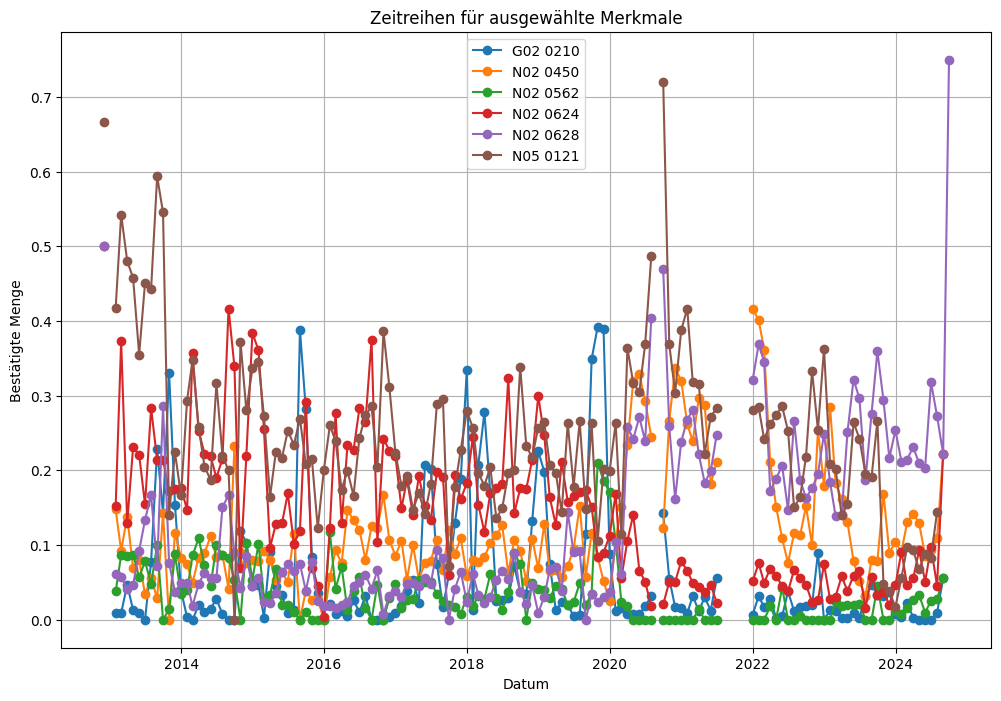

In [79]:
import matplotlib.pyplot as plt

def plot_time_series_from_keys(monthly_aggregates, filtered_keys):
    plt.figure(figsize=(12, 8))  # Größe des Plots anpassen

    # Durchgehen der gefilterten Schlüssel und Plotten jeder Zeitreihe
    for key in filtered_keys:
        merkmalname, merkmalwert = key
        if merkmalname in monthly_aggregates and merkmalwert in monthly_aggregates[merkmalname]:
            df = monthly_aggregates[merkmalname][merkmalwert]
            plt.plot(pd.to_datetime(df['Datum']), df['Relativer Anteil'], marker='o', linestyle='-', label=f'{merkmalname} {merkmalwert}')
    
    plt.title('Zeitreihen für ausgewählte Merkmale')
    plt.xlabel('Datum')
    plt.ylabel('Bestätigte Menge')
    plt.legend()
    plt.grid(True)
    plt.show()

# Beispielaufruf der Funktion mit dem gefilterten 'filtered_keys'
plot_time_series_from_keys(monthly_aggregates, filtered_keys)


In [44]:
def get_start_end_years(monthly_aggregates):
    start_end_years = {}
    
    # Durchlaufen aller Einträge im Wörterbuch
    for merkmalname, merkmale in monthly_aggregates.items():
        for merkmalwert, df in merkmale.items():
            if not df.empty:
                start_year = df['Datum'].dt.year.min()  # Startjahr der Zeitreihe
                end_year = df['Datum'].dt.year.max()    # Endjahr der Zeitreihe
                # Schlüssel speichern mit Start- und Endjahr
                start_end_years[(merkmalname, merkmalwert)] = (start_year, end_year)
    
    return start_end_years

# Aufruf der Funktion
start_end_years = get_start_end_years(monthly_aggregates)

# Ausgabe der Ergebnisse
for key, (start_year, end_year) in start_end_years.items():
    print(f'Merkmalname: {key[0]}, Merkmalwert: {key[1]}, Startjahr: {start_year}, Endjahr: {end_year}')


Merkmalname: B10, Merkmalwert: 0030, Startjahr: 2013, Endjahr: 2017
Merkmalname: B10, Merkmalwert: 0033, Startjahr: 2017, Endjahr: 2020
Merkmalname: B10, Merkmalwert: 0035, Startjahr: 2012, Endjahr: 2021
Merkmalname: B10, Merkmalwert: 0036, Startjahr: 2014, Endjahr: 2021
Merkmalname: B10, Merkmalwert: 0038, Startjahr: 2014, Endjahr: 2020
Merkmalname: B10, Merkmalwert: 0039, Startjahr: 2017, Endjahr: 2020
Merkmalname: B10, Merkmalwert: 0040, Startjahr: 2012, Endjahr: 2020
Merkmalname: B10, Merkmalwert: 0042, Startjahr: 2014, Endjahr: 2020
Merkmalname: B10, Merkmalwert: 0046, Startjahr: 2018, Endjahr: 2019
Merkmalname: B10, Merkmalwert: 0090, Startjahr: 2013, Endjahr: 2020
Merkmalname: B10, Merkmalwert: 0091, Startjahr: 2014, Endjahr: 2020
Merkmalname: B10, Merkmalwert: 0092, Startjahr: 2017, Endjahr: 2021
Merkmalname: B10, Merkmalwert: 0100, Startjahr: 2013, Endjahr: 2017
Merkmalname: B10, Merkmalwert: 0102, Startjahr: 2015, Endjahr: 2021
Merkmalname: B10, Merkmalwert: 0104, Startjahr: 

In [45]:
def count_years(monthly_aggregates):
    start_years = {}
    end_years = {}
    start_end_combinations = {}
    
    # Durchlaufen aller Einträge im Wörterbuch
    for merkmalname, merkmale in monthly_aggregates.items():
        for merkmalwert, df in merkmale.items():
            if not df.empty:
                start_year = df['Datum'].dt.year.min()  # Startjahr der Zeitreihe
                end_year = df['Datum'].dt.year.max()    # Endjahr der Zeitreihe
                
                # Zählen der Startjahre
                if start_year in start_years:
                    start_years[start_year] += 1
                else:
                    start_years[start_year] = 1
                
                # Zählen der Endjahre
                if end_year in end_years:
                    end_years[end_year] += 1
                else:
                    end_years[end_year] = 1
                
                # Zählen der Kombinationen von Start- und Endjahr
                start_end_key = (start_year, end_year)
                if start_end_key in start_end_combinations:
                    start_end_combinations[start_end_key] += 1
                else:
                    start_end_combinations[start_end_key] = 1
    
    return start_years, end_years, start_end_combinations

# Aufruf der Funktion und Ergebnisausgabe
start_years_count, end_years_count, start_end_combinations_count = count_years(monthly_aggregates)

start_years_count, end_years_count, start_end_combinations_count


({2013: 84,
  2017: 20,
  2012: 11,
  2014: 21,
  2018: 36,
  2015: 19,
  2016: 18,
  2022: 41,
  2020: 61,
  2019: 25,
  2023: 13,
  2021: 26,
  2024: 6},
 {2017: 7,
  2020: 53,
  2021: 50,
  2019: 26,
  2024: 170,
  2023: 26,
  2022: 4,
  2015: 22,
  2016: 13,
  2018: 5,
  2014: 1,
  2013: 4},
 {(2013, 2017): 4,
  (2017, 2020): 4,
  (2012, 2021): 3,
  (2014, 2021): 7,
  (2014, 2020): 9,
  (2012, 2020): 2,
  (2018, 2019): 5,
  (2013, 2020): 16,
  (2017, 2021): 9,
  (2015, 2021): 4,
  (2016, 2020): 5,
  (2022, 2024): 36,
  (2020, 2024): 41,
  (2018, 2024): 19,
  (2019, 2024): 19,
  (2023, 2024): 11,
  (2019, 2023): 3,
  (2022, 2023): 4,
  (2013, 2024): 8,
  (2013, 2023): 4,
  (2016, 2022): 1,
  (2012, 2023): 1,
  (2016, 2023): 1,
  (2013, 2015): 17,
  (2013, 2021): 12,
  (2015, 2019): 3,
  (2018, 2022): 1,
  (2015, 2024): 1,
  (2016, 2021): 2,
  (2020, 2020): 10,
  (2019, 2020): 2,
  (2021, 2021): 4,
  (2021, 2024): 21,
  (2020, 2021): 2,
  (2024, 2024): 6,
  (2015, 2015): 2,
  (2015, 

In [46]:
# Sortierung der Startjahre, Endjahre und Jahrkombinationen
sorted_start_years = dict(sorted(start_years_count.items()))
sorted_end_years = dict(sorted(end_years_count.items()))
sorted_year_combinations = dict(sorted(start_end_combinations_count.items(), key=lambda x: (x[0][0], x[0][1])))

print("Sortierte Startjahre:", sorted_start_years)
print("Sortierte Endjahre:", sorted_end_years)
print("Sortierte Kombinationen von Start- und Endjahren:", sorted_year_combinations)

Sortierte Startjahre: {2012: 11, 2013: 84, 2014: 21, 2015: 19, 2016: 18, 2017: 20, 2018: 36, 2019: 25, 2020: 61, 2021: 26, 2022: 41, 2023: 13, 2024: 6}
Sortierte Endjahre: {2013: 4, 2014: 1, 2015: 22, 2016: 13, 2017: 7, 2018: 5, 2019: 26, 2020: 53, 2021: 50, 2022: 4, 2023: 26, 2024: 170}
Sortierte Kombinationen von Start- und Endjahren: {(2012, 2015): 1, (2012, 2016): 1, (2012, 2020): 2, (2012, 2021): 3, (2012, 2023): 1, (2012, 2024): 3, (2013, 2013): 4, (2013, 2014): 1, (2013, 2015): 17, (2013, 2016): 10, (2013, 2017): 4, (2013, 2018): 2, (2013, 2019): 6, (2013, 2020): 16, (2013, 2021): 12, (2013, 2023): 4, (2013, 2024): 8, (2014, 2015): 2, (2014, 2019): 2, (2014, 2020): 9, (2014, 2021): 7, (2014, 2024): 1, (2015, 2015): 2, (2015, 2016): 1, (2015, 2017): 2, (2015, 2018): 1, (2015, 2019): 3, (2015, 2020): 5, (2015, 2021): 4, (2015, 2024): 1, (2016, 2016): 1, (2016, 2019): 5, (2016, 2020): 5, (2016, 2021): 2, (2016, 2022): 1, (2016, 2023): 1, (2016, 2024): 3, (2017, 2017): 1, (2017, 201

In [51]:
sorted_year_combinations

{(2012, 2015): 1,
 (2012, 2016): 1,
 (2012, 2020): 2,
 (2012, 2021): 3,
 (2012, 2023): 1,
 (2012, 2024): 3,
 (2013, 2013): 4,
 (2013, 2014): 1,
 (2013, 2015): 17,
 (2013, 2016): 10,
 (2013, 2017): 4,
 (2013, 2018): 2,
 (2013, 2019): 6,
 (2013, 2020): 16,
 (2013, 2021): 12,
 (2013, 2023): 4,
 (2013, 2024): 8,
 (2014, 2015): 2,
 (2014, 2019): 2,
 (2014, 2020): 9,
 (2014, 2021): 7,
 (2014, 2024): 1,
 (2015, 2015): 2,
 (2015, 2016): 1,
 (2015, 2017): 2,
 (2015, 2018): 1,
 (2015, 2019): 3,
 (2015, 2020): 5,
 (2015, 2021): 4,
 (2015, 2024): 1,
 (2016, 2016): 1,
 (2016, 2019): 5,
 (2016, 2020): 5,
 (2016, 2021): 2,
 (2016, 2022): 1,
 (2016, 2023): 1,
 (2016, 2024): 3,
 (2017, 2017): 1,
 (2017, 2018): 1,
 (2017, 2019): 4,
 (2017, 2020): 4,
 (2017, 2021): 9,
 (2017, 2024): 1,
 (2018, 2018): 1,
 (2018, 2019): 5,
 (2018, 2021): 7,
 (2018, 2022): 1,
 (2018, 2023): 3,
 (2018, 2024): 19,
 (2019, 2019): 1,
 (2019, 2020): 2,
 (2019, 2023): 3,
 (2019, 2024): 19,
 (2020, 2020): 10,
 (2020, 2021): 2,
 (2

## ML Model


In [52]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def prepare_data(data_dict, n_input, n_output):
    X, y = [], []
    for merkmalname, merkmale in data_dict.items():
        for merkmalwert, df in merkmale.items():
            values = df['Bestätigte Menge'].values
            # Skalierung der Daten
            scaler = MinMaxScaler(feature_range=(0, 1))
            values = scaler.fit_transform(values.reshape(-1, 1)).flatten()
            
            # Erstellen von Sequenzen
            for i in range(len(values) - n_input - n_output + 1):
                X.append(values[i:(i + n_input)])
                y.append(values[(i + n_input):(i + n_input + n_output)])
    
    return np.array(X), np.array(y)


In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

def build_model(n_input, n_output):
    model = Sequential([
        GRU(100, activation='relu', input_shape=(n_input, 1)),
        Dense(n_output)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model


In [64]:
n_input = 12  # Anzahl der Zeitpunkte, die als Input verwendet werden
n_output = 6  # Anzahl der vorherzusagenden Monate

X, y = prepare_data(monthly_aggregates, n_input, n_output)
model = build_model(n_input, n_output)

# Reshape von X für das Modell (Samples, Timesteps, Features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Modell trainieren
model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


324/324 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0622 - val_loss: 0.0616
Epoch 2/50
324/324 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0498 - val_loss: 0.0605
Epoch 3/50
324/324 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0485 - val_loss: 0.0584
Epoch 4/50
324/324 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0467 - val_loss: 0.0576
Epoch 5/50
324/324 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0477 - val_loss: 0.0575
Epoch 6/50
324/324 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0460 - val_loss: 0.0571
Epoch 7/50
324/324 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0460 - val_loss: 0.0565
Epoch 8/50
324/324 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0454 - val_loss: 0.0570
Epoch 9/50
324/324 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0458 - val_loss: 0.0561
Epoch 10/50
324/324 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0453 - val_loss: 0.0562
Epoch 11/50
324/324 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0447 - val_loss: 0.0559
Epoch 12/50
324/324 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.

In [69]:
# Angenommen, `latest_data` ist ein numpy-Array mit den letzten `n_input` Werten der Zeitreihe
latest_data = np.array([X[0]])  # Ersetze `your_latest_data` durch deine tatsächlichen Daten

# Skalierung anwenden (den gleichen Scaler wie beim Training verwenden)
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled_data = scaler.fit_transform(latest_data.reshape(-1, 1))
#scaled_data = scaled_data.reshape(1, n_input, 1)  # Reshape für das Modell

# Vorhersage treffen
predicted_data = model.predict(latest_data)

# Skalierung rückgängig machen
predicted_data = scaler.inverse_transform(predicted_data.flatten().reshape(-1, 1))

print("Vorhergesagte Werte:", predicted_data)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Vorhergesagte Werte: [[0.00165978]
 [0.00169152]
 [0.00074214]
 [0.00083245]
 [0.00086317]
 [0.00142508]]


In [70]:
y[0]

array([0.24615385, 0.21538462, 0.0974359 , 0.        , 0.        ,
       0.        ])

In [71]:
predicted_data

array([[0.00165978],
       [0.00169152],
       [0.00074214],
       [0.00083245],
       [0.00086317],
       [0.00142508]], dtype=float32)

In [75]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Flatten

def prepare_data(data_dict, n_input, n_output):
    X, y = [], []
    all_merkmalname = []
    all_merkmalwert = []
    
    # Sammeln aller Merkmalnamen und Merkmalwerte für das Encoding
    for merkmalname, merkmale in data_dict.items():
        for merkmalwert in merkmale.keys():
            all_merkmalname.append(merkmalname)
            all_merkmalwert.append(str(merkmalwert))  # Merkmalwert als String, falls es nicht schon ein String ist

    # One-Hot-Encoding für Merkmalname und Merkmalwert
    encoder_merkmalname = OneHotEncoder(sparse=False)
    encoder_merkmalwert = OneHotEncoder(sparse=False)
    encoded_merkmalname = encoder_merkmalname.fit_transform(np.array(all_merkmalname).reshape(-1, 1))
    encoded_merkmalwert = encoder_merkmalwert.fit_transform(np.array(all_merkmalwert).reshape(-1, 1))

    idx = 0
    for merkmalname, merkmale in data_dict.items():
        for merkmalwert, df in merkmale.items():
            values = df['Bestätigte Menge'].values
            scaler = MinMaxScaler(feature_range=(0, 1))
            values = scaler.fit_transform(values.reshape(-1, 1)).flatten()
            
            for i in range(len(values) - n_input - n_output + 1):
                X_seq = values[i:(i + n_input)]
                y_seq = values[(i + n_input):(i + n_input + n_output)]
                
                # Hinzufügen der kodierten Merkmalname und Merkmalwert
                X_seq = np.append(X_seq, encoded_merkmalname[idx])
                X_seq = np.append(X_seq, encoded_merkmalwert[idx])
                
                X.append(X_seq)
                y.append(y_seq)
            
            idx += 1

    return np.array(X), np.array(y)

def build_model(n_input, n_features, n_output):
    model = Sequential([
        GRU(100, activation='relu', input_shape=(n_input, n_features)),
        Flatten(),
        Dense(n_output)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

n_input = 12  # Anzahl der Zeitpunkte, die als Input verwendet werden
n_output = 6  # Anzahl der vorherzusagenden Monate

all_merkmalwert = filtered_df_crop['Merkmalwert'].unique()

# Berechnung der Anzahl der Features
n_features = 1 + len(monthly_aggregates) + len(set(all_merkmalwert))  # 1 für die 'Bestätigte Menge' + Anzahl der unique Merkmalname und Merkmalwerte

X, y = prepare_data(monthly_aggregates, n_input, n_output)
model = build_model(n_input, n_features, n_output)

# Reshape von X für das Modell (Samples, Timesteps, Features)
X = X.reshape((X.shape[0], X.shape[1], n_features))

# Modell trainieren
model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

## Relative Zeitreihen

In [76]:
import pandas as pd
from collections import defaultdict

# Angenommen df ist Ihr DataFrame und er enthält eine 'Datum'-Spalte im Datetime-Format
# Wenn das 'Datum' nicht im Datetime-Format ist, konvertieren Sie es wie folgt:
# df['Datum'] = pd.to_datetime(df['Datum'])

# Ein Wörterbuch, um die DataFrames zu speichern
monthly_aggregates = defaultdict(dict)

# Gruppierung nach 'Merkmalname'
grouped_by_merkmalname = filtered_df_crop.groupby('Merkmal')

# Erstellen eines Wörterbuchs für die Gesamtmengen pro Merkmalname und Monat
total_monthly_by_merkmalname = {}

# Berechnen der monatlichen Gesamtmengen für jedes Merkmalname
for merkmalname, group in grouped_by_merkmalname:
    total_monthly = group.resample('M', on='Datum')['Bestätigte Menge'].sum()
    total_monthly_by_merkmalname[merkmalname] = total_monthly

# Gruppierung nach 'Merkmalname' und 'Merkmalwert'
grouped = filtered_df.groupby(['Merkmal', 'Merkmalwert'])

# Durchlaufen aller Gruppen
for (merkmalname, merkmalwert), group in grouped:
    # Aggregation der 'Bestätigte Menge' nach Monat
    monthly_data = group.resample('M', on='Datum')['Bestätigte Menge'].sum().reset_index()
    # Berechnen des relativen Anteils
    relative_share = monthly_data.set_index('Datum')['Bestätigte Menge'] / total_monthly_by_merkmalname[merkmalname].reindex(monthly_data['Datum'], fill_value=0)
    # Hinzufügen der Spalte für den relativen Anteil
    monthly_data['Relativer Anteil'] = relative_share.values  # Achten Sie darauf, die Datum-Indizierung beizubehalten
    # Speichern des DataFrames im Wörterbuch
    monthly_aggregates[merkmalname][merkmalwert] = monthly_data

# Beispiel, um auf die Daten zuzugreifen:
for merkmalname, values in monthly_aggregates.items():
    for merkmalwert, data_df in values.items():
        print(f"Merkmal: {merkmalname}, Merkmalwert: {merkmalwert}")
        print(data_df)
        print()  # Für bessere Lesbarkeit eine leere Zeile hinzufügen


/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_88191/1897398977.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  total_monthly = group.resample('M', on='Datum')['Bestätigte Menge'].sum()
/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_88191/1897398977.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = group.resample('M', on='Datum')['Bestätigte Menge'].sum().reset_index()
/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_88191/1897398977.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = group.resample('M', on='Datum')['Bestätigte Menge'].sum().reset_index()
/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_88191/1897398977.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = g

Merkmal: B10, Merkmalwert: 0030
        Datum  Bestätigte Menge  Relativer Anteil
0  2013-04-30                 3          0.007692
1  2013-05-31                 0          0.000000
2  2013-06-30                 0          0.000000
3  2013-07-31                 0          0.000000
4  2013-08-31                 0          0.000000
5  2013-09-30                 0          0.000000
6  2013-10-31                 1          0.006944
7  2013-11-30                 0          0.000000
8  2013-12-31                 7          0.034314
9  2014-01-31                 0          0.000000
10 2014-02-28                 0          0.000000
11 2014-03-31                 0          0.000000
12 2014-04-30                48          0.125654
13 2014-05-31                42          0.156134
14 2014-06-30                19          0.106145
15 2014-07-31                 0          0.000000
16 2014-08-31                 0          0.000000
17 2014-09-30                 0          0.000000
18 2014-10-31     

In [78]:
monthly_aggregates

defaultdict(dict,
            {'B10': {'0030':         Datum  Bestätigte Menge  Relativer Anteil
              0  2013-04-30                 3          0.007692
              1  2013-05-31                 0          0.000000
              2  2013-06-30                 0          0.000000
              3  2013-07-31                 0          0.000000
              4  2013-08-31                 0          0.000000
              5  2013-09-30                 0          0.000000
              6  2013-10-31                 1          0.006944
              7  2013-11-30                 0          0.000000
              8  2013-12-31                 7          0.034314
              9  2014-01-31                 0          0.000000
              10 2014-02-28                 0          0.000000
              11 2014-03-31                 0          0.000000
              12 2014-04-30                48          0.125654
              13 2014-05-31                42          0.156134
       